<a href="https://colab.research.google.com/github/LNettob/Quimica_Tecnologica_UFU/blob/main/relatoriolab1_quimica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import t
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:


# -----------------------------------------------------------
# Análise Estatística de Dados Experimentais
# Disciplina: Química Tecnológica - 2025/1 - Turma A2 Prática 1
# Estudante: Lucas Netto Borges - Matrícula: 12021EAU001
# Universidade Federal de Uberlândia
# -----------------------------------------------------------

print("Início da Análise Estatística das Medições de Temperatura em Reator.")
print("-------------------------------------------------------------------\n")

# 1. Carregamento e Organização dos Dados Experimentais
# Dados de temperatura (°C) obtidos da Tabela 1 do documento "QuimTec_2025_1_Lab1_Atividade1_TA2.pdf".
temperaturas = [
    128.40, 127.89, 128.52, 129.22, 127.81, 127.81, 129.26, 128.61, 127.62, 128.43,
    127.63, 127.63, 128.19, 126.47, 126.62, 127.55, 127.19, 128.25, 127.27, 126.87,
    129.17, 127.82, 128.05, 126.86, 127.56, 128.09, 127.08, 128.30, 127.52, 127.77,
    127.52, 129.48, 127.99, 127.15, 128.66, 127.02, 128.17, 126.43, 126.94, 128.16
]

# Geração dos valores de tempo correspondentes, assumindo intervalos de 1 segundo a partir de 0s.
tempos = list(range(len(temperaturas)))

# Criação de um DataFrame Pandas para estruturar os dados.
df_temperaturas = pd.DataFrame({'Tempo (s)': tempos, 'Temperatura (°C)': temperaturas})

# 2. Cálculos Estatísticos Fundamentais
N = len(temperaturas) # Número total de medições.

# Cálculo da Média Aritmética (valor mais provável do mensurando).
media_temperatura = np.mean(temperaturas)

# Cálculo do Desvio Padrão Amostral (S), com correção de Bessel (ddof=1).
desvio_padrao_amostral = np.std(temperaturas, ddof=1)

# Cálculo da Variância Amostral (S²), com correção de Bessel (ddof=1).
variancia_amostral = np.var(temperaturas, ddof=1)

# Determinação da incerteza associada à medida do sensor, que corresponde ao desvio padrão amostral.
incerteza_sensor = desvio_padrao_amostral

# Cálculo do Erro Padrão da Média (Sm).
erro_padrao_media = desvio_padrao_amostral / np.sqrt(N)

# Definição dos parâmetros para o cálculo dos Intervalos de Confiança.
graus_liberdade = N - 1 # Graus de liberdade (n-1 para amostras).
nivel_confianca = 0.95 # Nível de confiança de 95%.

# Obtenção do valor crítico da distribuição t-Student (t-score).
t_score = t.ppf((1 + nivel_confianca) / 2, graus_liberdade)

# Cálculo do Intervalo de Confiança da Medida (individual) para 95%.
limite_inferior_medida_individual = media_temperatura - t_score * desvio_padrao_amostral
limite_superior_medida_individual = media_temperatura + t_score * desvio_padrao_amostral

# Cálculo do Intervalo de Confiança do Valor Médio para 95%.
limite_inferior_media = media_temperatura - t_score * erro_padrao_media
limite_superior_media = media_temperatura + t_score * erro_padrao_media



Início da Análise Estatística das Medições de Temperatura em Reator.
-------------------------------------------------------------------



In [5]:

# 3. Apresentação dos Resultados Numéricos
print("\n--- Resultados Numéricos da Análise Estatística ---")
print(f"Número de medições (N): {N}")
print(f"Média das temperaturas (x̄): {media_temperatura:.2f} °C")
print(f"Desvio Padrão Amostral (S): {desvio_padrao_amostral:.4f} °C")
print(f"Variância Amostral (S²): {variancia_amostral:.4f} (°C)^2")
print(f"Incerteza associada à medida do sensor: {incerteza_sensor:.4f} °C")
print(f"Erro Padrão da Média (Sm): {erro_padrao_media:.4f} °C")
print(f"Valor T-Student para {nivel_confianca*100:.0f}% de confiança e {graus_liberdade} Graus de Liberdade (GL): {t_score:.2f}")
print(f"Intervalo de Confiança da Medida (Individual, 95%): [{limite_inferior_medida_individual:.2f} °C, {limite_superior_medida_individual:.2f} °C]")
print(f"Intervalo de Confiança do Valor Médio (95%): [{limite_inferior_media:.2f} °C, {limite_superior_media:.2f} °C]")



--- Resultados Numéricos da Análise Estatística ---
Número de medições (N): 40
Média das temperaturas (x̄): 127.82 °C
Desvio Padrão Amostral (S): 0.7621 °C
Variância Amostral (S²): 0.5809 (°C)^2
Incerteza associada à medida do sensor: 0.7621 °C
Erro Padrão da Média (Sm): 0.1205 °C
Valor T-Student para 95% de confiança e 39 Graus de Liberdade (GL): 2.02
Intervalo de Confiança da Medida (Individual, 95%): [126.28 °C, 129.37 °C]
Intervalo de Confiança do Valor Médio (95%): [127.58 °C, 128.07 °C]



--- Geração e Análise de Gráficos ---

Comentário sobre o Histograma:
O histograma apresenta a distribuição de frequência das medições de temperatura. A sobreposição da Curva de Densidade de Kernel (KDE) permite visualizar a forma da distribuição de probabilidade. A inspeção visual da simetria e da presença de um único pico central (forma gaussiana ou de sino) é crucial para inferir a predominância de erros aleatórios. Desvios significativos desta forma, como assimetrias ou múltiplos picos, poderiam sugerir a influência de fontes de erro sistemático ou variações não controladas no processo.

Comentário sobre a Dispersão dos Dados em Relação à Média e aos Limites do Intervalo de Confiança:
O gráfico de temperatura versus tempo permite avaliar a estabilidade do processo e a natureza da variação das medições. A proximidade dos pontos de dados à linha da média e a sua permanência predominantemente dentro dos limites do intervalo de confiança de 95% para a média indicam um processo sob con

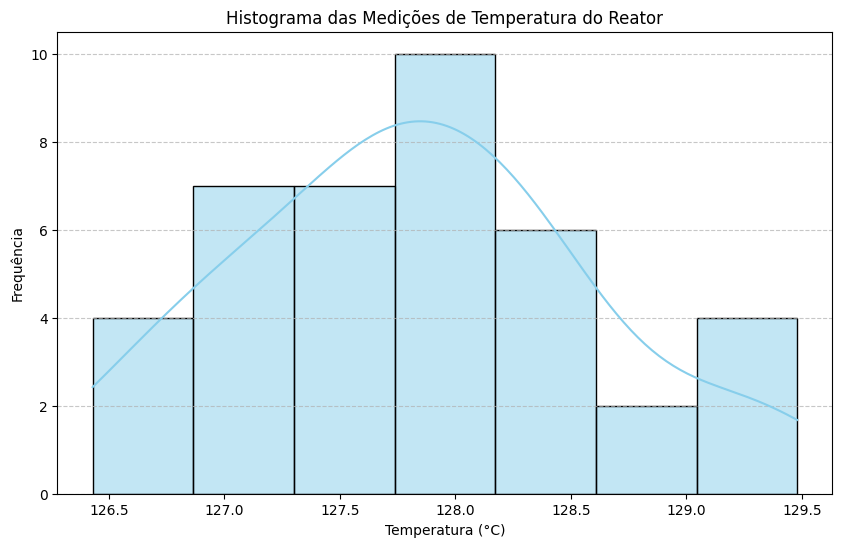

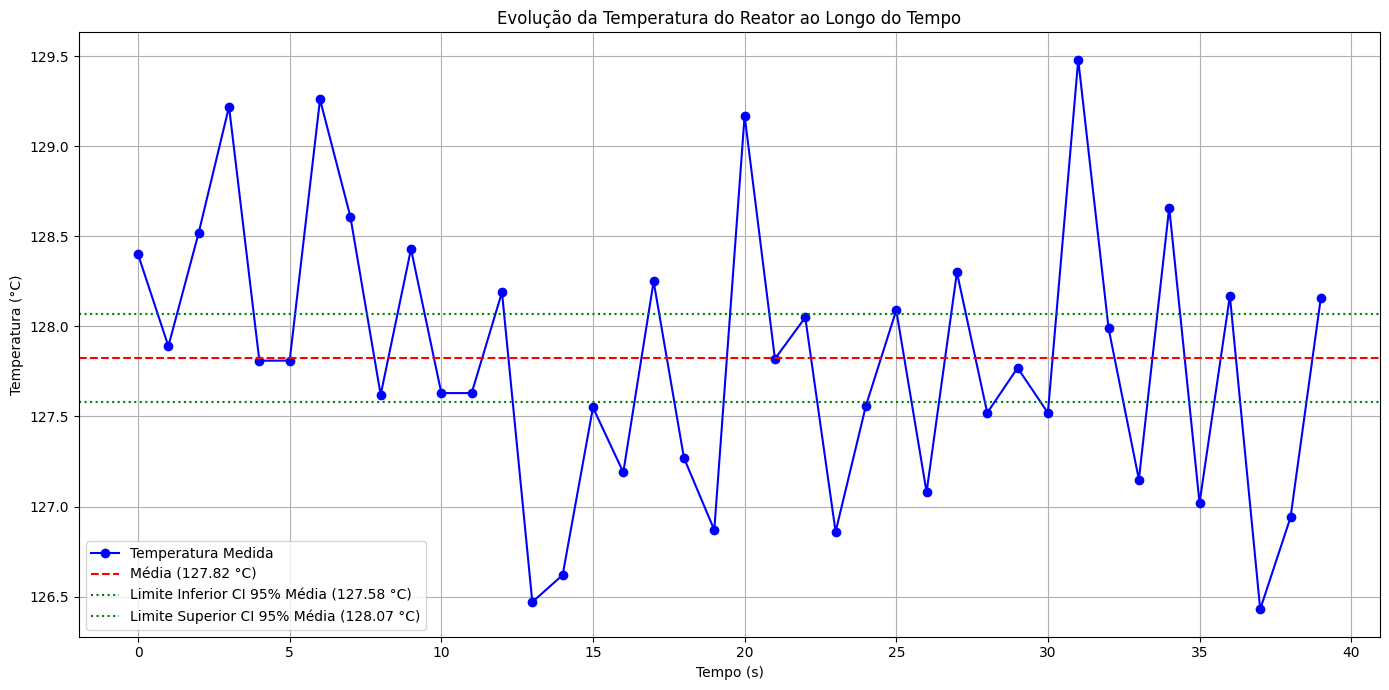


Análise concluída com sucesso.


In [6]:
# 4. Construção e Análise dos Gráficos

print("\n--- Geração e Análise de Gráficos ---")

# a) Histograma dos dados de temperatura.
plt.figure(figsize=(10, 6))
sns.histplot(temperaturas, kde=True, bins=7, color='skyblue', edgecolor='black')
plt.title('Histograma das Medições de Temperatura do Reator')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)

print("\nComentário sobre o Histograma:")
print("O histograma apresenta a distribuição de frequência das medições de temperatura. A sobreposição da Curva de Densidade de Kernel (KDE) permite visualizar a forma da distribuição de probabilidade. A inspeção visual da simetria e da presença de um único pico central (forma gaussiana ou de sino) é crucial para inferir a predominância de erros aleatórios. Desvios significativos desta forma, como assimetrias ou múltiplos picos, poderiam sugerir a influência de fontes de erro sistemático ou variações não controladas no processo.")

# b) Representação gráfica dos valores medidos em função do tempo.
plt.figure(figsize=(14, 7))
plt.plot(df_temperaturas['Tempo (s)'], df_temperaturas['Temperatura (°C)'], marker='o', linestyle='-', color='blue', label='Temperatura Medida')

# Inclusão de linha horizontal indicando a média das medições.
plt.axhline(media_temperatura, color='red', linestyle='--', label=f'Média ({media_temperatura:.2f} °C)')

# Inclusão das linhas correspondentes aos limites superior e inferior do intervalo de confiança de 95% para a média.
plt.axhline(limite_inferior_media, color='green', linestyle=':', label=f'Limite Inferior CI 95% Média ({limite_inferior_media:.2f} °C)')
plt.axhline(limite_superior_media, color='green', linestyle=':', label=f'Limite Superior CI 95% Média ({limite_superior_media:.2f} °C)')

plt.title('Evolução da Temperatura do Reator ao Longo do Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout() # Ajuste automático do layout para evitar sobreposição.

print("\nComentário sobre a Dispersão dos Dados em Relação à Média e aos Limites do Intervalo de Confiança:")
print("O gráfico de temperatura versus tempo permite avaliar a estabilidade do processo e a natureza da variação das medições. A proximidade dos pontos de dados à linha da média e a sua permanência predominantemente dentro dos limites do intervalo de confiança de 95% para a média indicam um processo sob controle estatístico e que as flutuações são majoritariamente atribuíveis a erros aleatórios. A presença de tendências (aumento ou diminuição sistemática) ou desvios significativos e persistentes para fora do intervalo de confiança poderia sinalizar a existência de erros sistemáticos, variações nas condições operacionais do reator, ou a necessidade de revisão do modelo de medição.")

# Exibe todas as janelas de gráficos geradas simultaneamente.
plt.show()

print("\nAnálise concluída com sucesso.")